### Proyecto detección de Bicicletas

* V.0.1

* Caso más simple; detección lateral

In [1]:
from skimage.feature import hog

**scikit-image** 

Es una colección de algoritmos para el procesamiento de imágenes.

In [2]:
#pip install --upgrade scikit-image
import cv2 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

import glob

## Detección de bicicletas

In [3]:
bike = glob.glob('../data/bicicleta/dataset1/*.jpg')
no_bike = glob.glob('../data/no_bicicleta/dataset1/*.jpg')

In [4]:
len(bike)

358

In [5]:
len(no_bike)

380

##### Mostrando el ejemplo de una de las imagenes en una posición

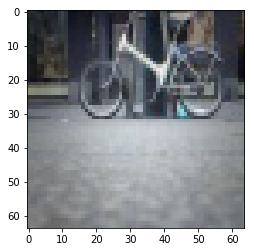

In [6]:
image_color = cv2.imread(bike[12]) 
plt.imshow(image_color)

In [7]:
im_gray = cv2.GaussianBlur(image_color, (5, 5), 0)

##  Convertir a escala de grises

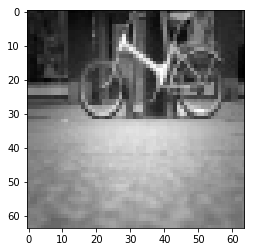

In [8]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = 'gray')

##  OBTENER CARACTERÍSTICAS DE HOG

In [9]:
features, hog_image = hog(image_gray, 
                          orientations = 11, 
                          pixels_per_cell = (16, 16), 
                          cells_per_block = (2, 2), 
                          transform_sqrt = False, 
                          visualize = True, 
                          feature_vector = True)

features.shape 

(396,)

In [10]:
hog_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

* Mostrar la forma de la imagen
* Grupo de estrellas donde conoces sus magnitudes y ángulos que representa esa imagen

In [11]:
hog_image.shape

(64, 64)

True

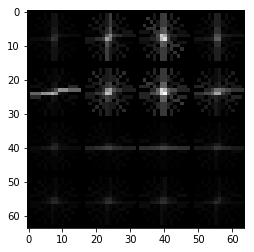

In [12]:
plt.imshow(hog_image, cmap = 'gray')
cv2.imwrite('../data/bicicleta/resultado/01.png',hog_image)

##  HOG FEATURE EXTRACCIÓN Y FORMACIÓN DE DATASET DE FORMACIÓN

##### HOG FEATURE EXTRACTION AND TRAINING DATASET CREATION 

* Bucle for para todo el dataset de ciclistas
* PARA TODOS LOS DATOS en escala de grises y después funcion HOG
* Ir acomulando todas las carateristicas.
* ciclista_hog_accum.append(ciclista_hog_feature) --> Matriz que representa las características para TODOS.

In [13]:
bike_hog_accum = []
cont = 1
for i in bike:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    bike_hog_feature, bike_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
    #cv2.imwrite('../data/bicicleta/resultado/0'+str(cont)+'.jpg',bike_hog_img)
    cont+=1
    bike_hog_accum.append(bike_hog_feature)

### Crear los datos guardados

- Entrenar en un clasificador
- Asignar etiqueta
- X las características
- Y la etiqueta

In [14]:
X_ciclista = np.vstack(bike_hog_accum).astype(np.float64)  
Y_ciclista = np.ones(len(X_ciclista))

In [15]:
X_ciclista.shape

(358, 396)

In [16]:
Y_ciclista.shape

(358,)

In [17]:
Y_ciclista

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## No_Bike

##### HOG FEATURE EXTRACTION AND TRAINING DATASET CREATION 

* Bucle for para todo el dataset de no_ciclistas
* PARA TODOS LOS DATOS en escala de grises y después funcion HOG
* Ir acomulando todas las carateristicas.
* ciclista_hog_accum.append(ciclista_hog_feature) --> Matriz que representa las características para TODOS.

In [18]:
nobike_hog_accum = []

for i in no_bike:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    nobike_hog_feature, nobike_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
                
    nobike_hog_accum.append(nobike_hog_feature)


### Crear los datos guardados

- Entrenar en un clasificador
- Asignar etiqueta
- X las características
- Y la etiqueta

In [19]:
X_nociclista = np.vstack(nobike_hog_accum).astype(np.float64)  
Y_nociclista  = np.zeros(len(X_nociclista))

In [20]:
X_nociclista.shape

(380, 396)

In [21]:
Y_nociclista.shape

(380,)

In [22]:
X = np.vstack((X_ciclista, X_nociclista))
X.shape

(738, 396)

In [23]:
y = np.hstack((Y_ciclista, Y_nociclista))
y.shape

(738,)

## MODELO DE CLASIFICADOR SVM ENTRENAMIENTO

### Entrenar MODELO SVM

- El 25% utilizado para la prueba
- El 75 % para entrenamiento
- Pasar las características y etiquetas

Dividir matrices o matrices en subgrupos de prueba y entrenamiento al azar

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [26]:
X_train

array([[0.3288164 , 0.08247286, 0.02396769, ..., 0.06011418, 0.04927916,
        0.0423706 ],
       [0.14483798, 0.17247421, 0.10924814, ..., 0.01712687, 0.02051466,
        0.03340591],
       [0.11515728, 0.06910485, 0.05946359, ..., 0.13180573, 0.05108206,
        0.03908492],
       ...,
       [0.17703395, 0.09372598, 0.09528499, ..., 0.04368554, 0.00465501,
        0.00660116],
       [0.24119316, 0.13158913, 0.07127863, ..., 0.06120428, 0.05098192,
        0.12743747],
       [0.23428681, 0.22957116, 0.23428681, ..., 0.11202378, 0.07768665,
        0.06270527]])

In [27]:
X_test

array([[0.33743086, 0.33743086, 0.19341326, ..., 0.02135929, 0.0179476 ,
        0.09703072],
       [0.14471902, 0.06805222, 0.09374532, ..., 0.07306312, 0.06129913,
        0.04970954],
       [0.17614256, 0.08133111, 0.0694053 , ..., 0.04255346, 0.08591755,
        0.0927311 ],
       ...,
       [0.01899164, 0.01341646, 0.02353363, ..., 0.08649281, 0.09340831,
        0.07451155],
       [0.24283928, 0.09210932, 0.06339067, ..., 0.05410391, 0.02681904,
        0.04286637],
       [0.04879514, 0.02178594, 0.05114984, ..., 0.02052305, 0.01008013,
        0.00870017]])

## Modelo Soporte SVM lineal

- Instanciar un objeto LinearSVC()
- Usar los datos de entrenamiento

* Fit: Ajustar el modelo de acuerdo con los datos de entrenamiento dados.

In [28]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
svc_model = LinearSVC()
svc_model.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [30]:
from sklearn.externals import joblib

### Guardar modelo

In [31]:
model_path='data/'
from sklearn.externals import joblib
filename = 'finalized4_model.sav'
joblib.dump(svc_model, filename)
#joblib.dump(model, "model.pkl")

['finalized4_model.sav']

### Para lectura


In [32]:
filename = 'finalized2_model.sav'

### Matriz de confunsión

- Ventana unica que enseña las muestras correctamente clasificada y las que no fueron correctamente clasificadas.

- Predijó que: si coniciden con los valores verdaderos será un color rosita
- Si fue 0,1 o 1,0 es incorrectamente clasificado

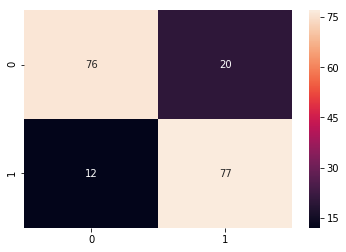

In [34]:
y_predict = svc_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")

## REPORTE

- Precisión 
- Recall 
- f1-score 

In [35]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

        0.0       0.86      0.79      0.83        96
        1.0       0.79      0.87      0.83        89

avg / total       0.83      0.83      0.83       185



In [36]:
Model_prediction = svc_model.predict(X_test[0:50])
Model_prediction

array([0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.])

In [37]:
print(Model_prediction.shape) 

(50,)


- Aqui muestra 0 No hay ciclista y 1 para SI hay ciclista

In [38]:
Model_TrueLabel = y_test[0:50]
Model_TrueLabel

array([0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.])

In [39]:
print(Model_TrueLabel.shape) 

(50,)


In [40]:
## Mejorar el modelo

In [41]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6216216216216216, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6432432432432432, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5956284153005464, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8378378378378378, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8216216216216217, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8579234972677595, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5135135135135135, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5135135135135135, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5136612021857924, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.5135135135135135, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=rbf .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   23.7s finished


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
### Matriz de confusión

             precision    recall  f1-score   support

        0.0       0.91      0.83      0.87        96
        1.0       0.84      0.91      0.87        89

avg / total       0.87      0.87      0.87       185



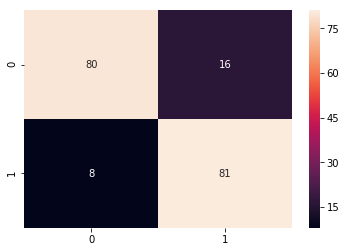

In [43]:
grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,grid_predictions))

In [44]:
model_path='data/'
from sklearn.externals import joblib
filename = 'finalized_grid_model.sav'
joblib.dump(grid_predictions, filename)
#joblib.dump(model, "model.pkl")

['finalized_grid_model.sav']

## PRUEBA EL MODELO (Test the model) 
### ENCUENTRA CICLISTAS

### Correr con una imagen de prueba

- Imagen real que el clasificador no ha visto jamás

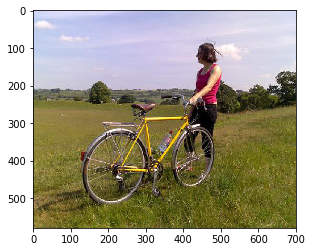

In [99]:
test_image = mpimg.imread('../data/test_images/img0.jpg')
#test_image = mpimg.imread('../data/test_images/b2.jpg')
#test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
plt.imshow(test_image)
#test_image = test_image.astype(np.float32)/255

In [100]:
h_start=0
h_stop=700

(580, 700, 3)

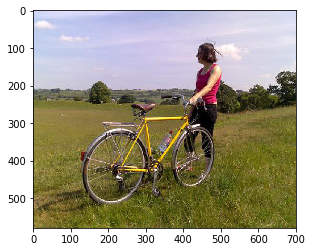

In [101]:
pixels_in_cell = 16
HOG_orientations = 11
cells_in_block = 2
cells_in_step = 3

masked_region = test_image[h_start:h_stop,:,:]
plt.imshow(masked_region)
masked_region.shape

## Recorte de la imagen

In [102]:
resizing_factor = 2
masked_region_shape = masked_region.shape
L = masked_region_shape[1]/resizing_factor
W = masked_region_shape[0]/resizing_factor

(290, 350, 3)


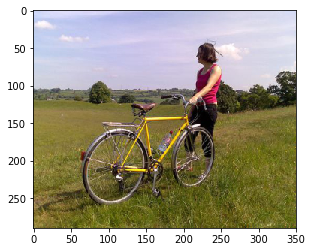

In [103]:
masked_region_resized = cv2.resize(masked_region, (np.int(L), np.int(W)))
masked_region_resized_R = masked_region_resized[:,:,0]

print(masked_region_resized.shape)
plt.imshow(masked_region_resized)

## Región de interés

In [104]:
print(masked_region_resized_R.shape)    
masked_region_hog_feature_all,hog_img2 = hog(masked_region_resized_R, 
                                            orientations = 11, 
                                            pixels_per_cell = (16, 16), 
                                            cells_per_block = (2, 2), 
                                            transform_sqrt = False, 
                                            visualise = True, 
                                            feature_vector = False)


(290, 350)


C:\Users\Mary\Anaconda35\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


## Predecir

In [105]:
n_blocks_x = (masked_region_resized_R.shape[1] // pixels_in_cell)+1  
n_blocks_y = (masked_region_resized_R.shape[0] // pixels_in_cell)+1

#nfeat_per_block = orientations * cells_in_block **2 
blocks_in_window = (64 // pixels_in_cell)-1 
    
steps_x = (n_blocks_x - blocks_in_window) // cells_in_step
steps_y = (n_blocks_y - blocks_in_window) // cells_in_step

rectangles_found = []

for xb in range(steps_x):
    for yb in range(steps_y):
        y_position = yb*cells_in_step
        x_position = xb*cells_in_step
            
        hog_feat_sample = masked_region_hog_feature_all[y_position : y_position + blocks_in_window, x_position : x_position + blocks_in_window].ravel()
        x_left = x_position * pixels_in_cell
        y_top = y_position * pixels_in_cell
        print(hog_feat_sample.shape)  
        
        # predecir usando SVM entrenado
        test_prediction = svc_model.predict(hog_feat_sample.reshape(1,-1))
        #test_prediction = grid.predict(hog_feat_sample.reshape(1,-1))
        print(test_prediction)
        
        ## Encontrar los rectángulos de todos los autos detectados
        if test_prediction == 1: 
            rectangle_x_left = np.int(x_left * resizing_factor)
            rectangle_y_top = np.int(y_top * resizing_factor)
            window_dim = np.int(64 * resizing_factor)
            rectangles_found.append(((rectangle_x_left, rectangle_y_top + h_start),(rectangle_x_left + window_dim, rectangle_y_top + window_dim + h_start)))
                

(396,)
[0.]
(396,)
[0.]
(396,)
[0.]
(396,)
[0.]
(396,)
[0.]
(396,)
[0.]
(396,)
[0.]
(396,)
[0.]
(396,)
[1.]
(396,)
[1.]
(396,)
[0.]
(396,)
[0.]
(396,)
[0.]
(396,)
[1.]
(396,)
[1.]
(396,)
[0.]
(396,)
[0.]
(396,)
[0.]
(396,)
[1.]
(396,)
[0.]
(396,)
[0.]
(396,)
[1.]
(396,)
[0.]
(396,)
[0.]
(396,)
[1.]
(396,)
[0.]
(396,)
[0.]
(396,)
[0.]
(396,)
[0.]
(396,)
[0.]


In [106]:
rectangles_found

[((96, 288), (224, 416)),
 ((96, 384), (224, 512)),
 ((192, 288), (320, 416)),
 ((192, 384), (320, 512)),
 ((288, 288), (416, 416)),
 ((384, 96), (512, 224)),
 ((384, 384), (512, 512))]

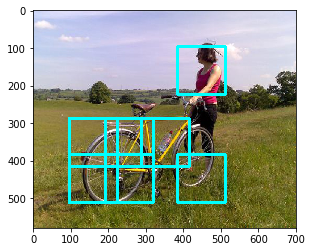

In [107]:
Image_with_Rectangles_Drawn = np.copy(test_image)
    
for rectangle in rectangles_found:
    cv2.rectangle(Image_with_Rectangles_Drawn, rectangle[0], rectangle[1], (0, 255, 255), 5)

plt.imshow(Image_with_Rectangles_Drawn)